## Midterm 2 - MNIST Classification
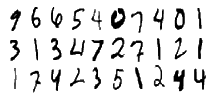
### Preparing environment and dataset:
* pip install python-mnist
* create folder midterm/data
* download from https://drive.google.com/open?id=1AQwyy3xP7rjDWMPkWBW4kKOfpkIyAWt8 - 4 files
* extract all files to ./data

#### The error of your classifier on test dataset must be better then 12.0% LeCun et al. 1998
#### Enter your error at https://goo.gl/forms/r52T6newOqn1Wcw03
#### Commit your code to github/bitbucket into folder midterm


In [1]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
from __future__ import print_function
import matplotlib.pyplot as plt
from scipy import ndimage
import numpy as np
import os
import sys


# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

/root/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log2
  app.launch_new_instance()


ValueError: range parameter must be finite.

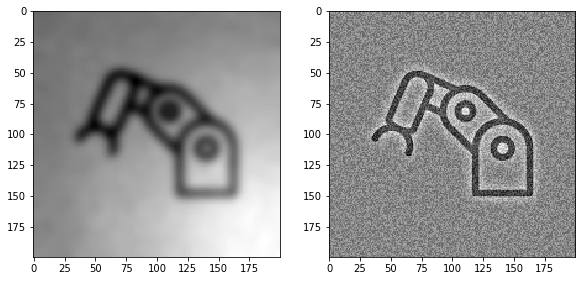

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as img
from scipy import ndimage as nimg 
import numpy as np
arms = img.imread(r'./data2/Arms/4.png')
gflt = nimg.gaussian_filter(arms, sigma = 4)
fig = plt.figure(figsize=(15, 10))
plt.subplot(131)
plt.imshow(gflt, cmap='gray')
plt.subplot(132)
plt.imshow(arms, cmap = 'gray')
plt.imshow((arms-gflt), cmap = 'gray')
maxValue = (arms - gflt).max()
minValue = (arms - gflt).min()

diff = np.log2(arms) - np.log2(gflt)
newImage = (diff-minValue)/(maxValue-minValue)


# plt.subplot(133)
# plt.imshow(newImage, cmap='gray')
plt.hist(newImage.flatten())
plt.show()


1.87166 -8.93721


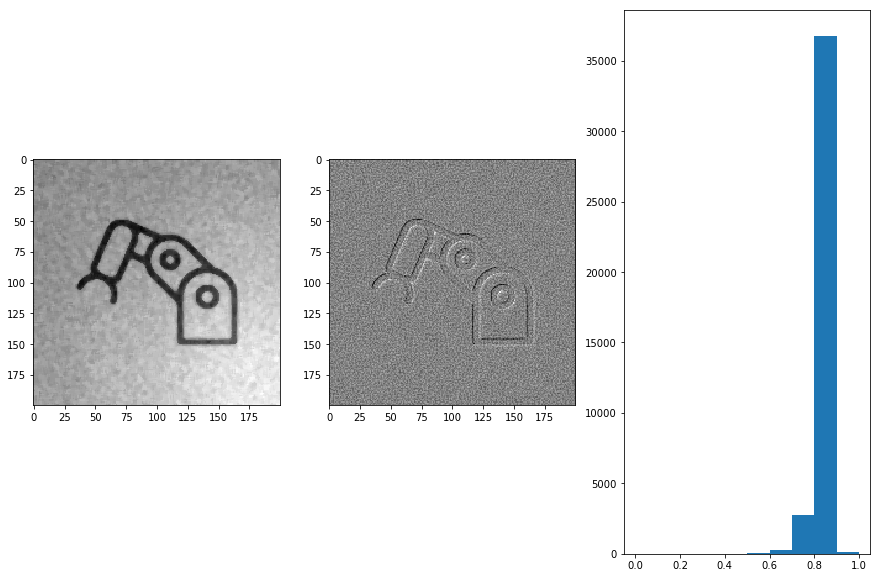

In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as img
from scipy import ndimage as nimg 
import numpy as np
arms = img.imread(r'./data2/Arms/4.png')
gflt = nimg.median_filter(arms, 4)
fig = plt.figure(figsize=(15, 10))
plt.subplot(131)
plt.imshow(gflt, cmap='gray')
plt.subplot(132)
plt.imshow(arms, cmap = 'gray')
plt.imshow((arms-gflt), cmap = 'gray')
arms = arms + 0.001
diff = np.log2(arms) - np.log2(gflt)
maxValue = diff.max()
minValue = diff.min()

print(maxValue,minValue)
newImage = (diff-minValue)/(maxValue-minValue)

plt.subplot(133)
plt.hist(newImage.flatten())
# plt.imshow(newImage, cmap='gray')
plt.show()


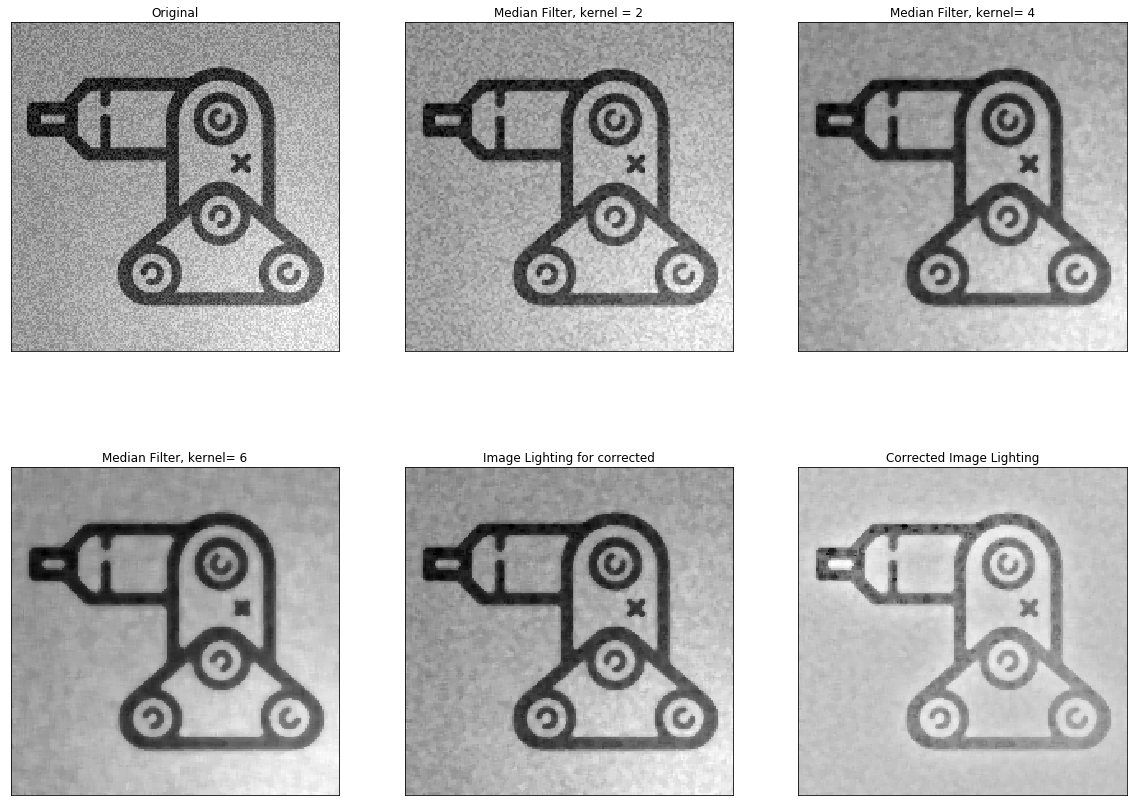

(array([   418.,   2036.,   2386.,   1544.,   1275.,   7043.,  13398.,
          7134.,   3678.,   1088.]),
 array([ 0.03137255,  0.12784314,  0.22431373,  0.32078432,  0.4172549 ,
         0.51372549,  0.61019608,  0.70666667,  0.80313726,  0.89960784,
         0.99607843]),
 <a list of 10 Patch objects>)

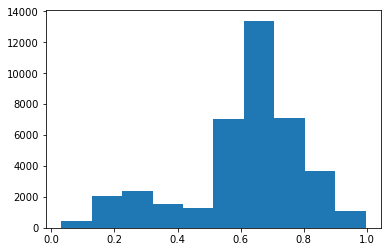

In [18]:
from __future__ import print_function
import matplotlib.pyplot as plt
import PIL
from PIL import Image
import numpy as np
import os
import shutil
import sys
from scipy import ndimage
from sklearn.model_selection import train_test_split

import matplotlib.image as img
import math
% matplotlib inline
im_saltpepper = img.imread('./data2/Arms/127.png')
im_median1 = ndimage.median_filter(im_saltpepper, size = 2)
im_saltpepper = img.imread('./data2/Arms/127.png')
im_median2 = ndimage.median_filter(im_saltpepper, size = 4)
im_saltpepper = img.imread('./data2/Arms//127.png')
im_median3 = ndimage.median_filter(im_saltpepper, size = 6)
im_saltpepper = img.imread('./data2/Arms/127.png')
im_lightcorrection = im_median2
im_gauss = ndimage.gaussian_filter(im_lightcorrection, sigma = 9)
maxValue = (im_lightcorrection - im_gauss).max()
minValue = (im_lightcorrection - im_gauss).min()
diff = np.log2(im_lightcorrection) - np.log2(im_gauss)
im_newlight = (diff-minValue)/(maxValue-minValue)
fig = plt.figure(figsize = (20, 15))
plt.subplot(231), plt.imshow(im_saltpepper, cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(232), plt.imshow(im_median1, cmap = 'gray')
plt.title('Median Filter, kernel = 2'), plt.xticks([]), plt.yticks([])
plt.subplot(233), plt.imshow(im_median2, cmap = 'gray')
plt.title('Median Filter, kernel= 4'), plt.xticks([]), plt.yticks([])
plt.subplot(234), plt.imshow(im_median3, cmap = 'gray')
plt.title('Median Filter, kernel= 6'), plt.xticks([]), plt.yticks([])
plt.subplot(235), plt.imshow(im_lightcorrection, cmap = 'gray')
plt.title('Image Lighting for corrected'), plt.xticks([]), plt.yticks([])
plt.subplot(236), plt.imshow(im_newlight, cmap = 'gray')
plt.title('Corrected Image Lighting'), plt.xticks([]), plt.yticks([])
plt.show()
plt.hist(im_median1.flatten())

./data2/Arms/
./data2/Figure_normal_legs/
./data2/FigureWheels/
./data2/Head/
./data2/Arms_re/
Full dataset tensor: (784, 28, 28)
Mean: 0.112809
Standard deviation: 0.143145
./data2/Figure_normal_legs_re/


/root/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:55: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.


Full dataset tensor: (622, 28, 28)
Mean: 0.0883994
Standard deviation: 0.16318
./data2/FigureWheels_re/
Full dataset tensor: (222, 28, 28)
Mean: 0.075104
Standard deviation: 0.165659
./data2/Head_re/
Full dataset tensor: (473, 28, 28)
Mean: 0.0372736
Standard deviation: 0.201234
Total samples number: (2101, 28, 28)
Samples for tests: 526
Samples for trains: 1575
(28, 28)
4


/root/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:114: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(784, input_shape=(784,), activation="relu", kernel_initializer="uniform")`
/root/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:115: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(392, activation="relu", kernel_initializer="uniform")`
/root/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:116: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(4, name="output", kernel_initializer="uniform")`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_3 (Reshape)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_6 (Dense)              (None, 392)               307720    
_________________________________________________________________
output (Dense)               (None, 4)                 1572      
_________________________________________________________________
softmax (Activation)         (None, 4)                 0         
Total params: 924,732
Trainable params: 924,732
Non-trainable params: 0
_________________________________________________________________
Train on 1181 samples, validate on 394 samples
Epoch 1/50
Epoch 00001: val_loss improved from inf to 0.65758, saving model to ./weights.

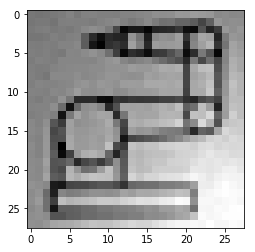

In [4]:
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
from scipy import ndimage
from PIL import Image as imag

%matplotlib inline

folders = [
    r'./data2/Arms/',
    r'./data2/Figure_normal_legs/',
    r'./data2/FigureWheels/',
    r'./data2/Head/'
]
folders2 = [
    r'./data2/Arms_re/',
    r'./data2/Figure_normal_legs_re/',
    r'./data2/FigureWheels_re/',
    r'./data2/Head_re/'
]
def resize_im(folder,folder2):
  """Load the data for a single image, resize and save it in new folder"""
  image_files = os.listdir(folder)
  print(folder)
  num_images = 0
  for image in image_files:
    image_file = os.path.join(folder, image)
    image_file2 = os.path.join(folder2, image)
    image_data = imag.open(image_file)
    image_data = image_data.resize((28,28),imag.ANTIALIAS)
    image_data.save(image_file2,quality=95) 
  return 

for idx in range(len(folders)):
    folder = folders[idx]
    folder2 = folders2[idx]
    resize_im(folder,folder2)

image_size = 28  
pixel_depth = 255.0  


def load_image(folder, min_num_images):
  """Load the data for a single image."""
  image_files = os.listdir(folder)
  dataset = np.ndarray(shape=(len(image_files), image_size, image_size),
                         dtype=np.float32)
  print(folder)
  num_images = 0
  for image in image_files:
    image_file = os.path.join(folder, image)
    try:
      image_data = (ndimage.imread(image_file).astype(float) - 
                    pixel_depth / 2) / pixel_depth
      if image_data.shape != (image_size, image_size):
        raise Exception('Unexpected image shape: %s' % str(image_data.shape))
      dataset[num_images, :, :] = image_data
      num_images = num_images + 1
    except IOError as e:
      print('Could not read:', image_file, ':', e, '- it\'s ok, skipping.')
    
  dataset = dataset[0:num_images, :, :]
  if num_images < min_num_images:
    raise Exception('Many fewer images than expected: %d < %d' %
                    (num_images, min_num_images))
    
  print('Full dataset tensor:', dataset.shape)
  print('Mean:', np.mean(dataset))
  print('Standard deviation:', np.std(dataset))
  return dataset

X_datasets = list()
Y_datasets = list()
for idx in range(len(folders)):
    folder = folders2[idx] 
    X_datasets.append(load_image(folder, 200))
    labels = np.zeros((X_datasets[-1].shape[0],len(folders)))
    labels[:,idx] = 1
    Y_datasets.append(labels)

from sklearn.model_selection import train_test_split

X_datasets2 = np.concatenate(X_datasets)
Y_datasets2 = np.concatenate(Y_datasets)
print("Total samples number:",X_datasets2.shape)
X_trains,X_tests,Y_trains,Y_tests = train_test_split(X_datasets2,Y_datasets2,test_size=0.25)
print("Samples for tests:",Y_tests.shape[0])
print("Samples for trains:",Y_trains.shape[0])
plt.imshow(X_tests[0],cmap='gray')


from keras.models import Sequential
from keras.layers import Dense,Activation,Reshape
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.optimizers import SGD
import numpy

callbacks = [
    EarlyStopping(monitor='val_loss',patience = 2, min_delta=0.00001, verbose=1,mode='auto'),
    ModelCheckpoint(filepath='./weights.net',monitor ='val_loss', verbose=1, save_best_only=True),
]

seed = 7
numpy.random.seed(seed)

input_dim = X_trains[0].shape[0]*X_trains[0].shape[1]
print((X_trains[0].shape[0],X_trains[0].shape[1]))
print(Y_trains[0].shape[0])
# create model
model = Sequential()
model.add(Reshape((input_dim,), input_shape=(X_trains[0].shape[0],X_trains[0].shape[1])))
model.add(Dense(input_dim, input_shape = (input_dim,), init='uniform', activation='relu'))
model.add(Dense(int(input_dim/2), init='uniform', activation='relu'))
model.add(Dense(Y_trains[0].shape[0],init='uniform', name="output"))
model.add(Activation('softmax', name="softmax"))
model.summary()

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
# Fit the model
model.fit(X_trains, 
          Y_trains, 
          epochs=50, 
          batch_size=10, 
          verbose=2, 
          validation_split=0.25,
          callbacks=callbacks)
# calculate predictions
results = model.evaluate(X_tests, Y_tests, batch_size=32, verbose=1, sample_weight=None)
# round predictions
print(results)